In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.impute import SimpleImputer
import pandas as pd  
import numpy as np
# Question 4
df = pd.read_csv("Diabetes.csv")

for col in df.columns:   
    x=pd.to_numeric(df[col], errors='coerce')
    idx = x.isna()
    seen = set()
    uniq = [x for x in df[idx][col] if x not in seen and not seen.add(x)]
    for j in df[idx][col]:
        df[col] = df[col].replace({j : np.NaN})
# 4-b
MyDataFram = df.copy()
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(MyDataFram)
my_array = imp.transform(MyDataFram)
MyDataFram = pd.DataFrame(my_array, columns = df.columns)

# 4-c MinMaxScaler
MyDataFram_MinMaxScaler = MyDataFram.copy()
scaler = MinMaxScaler()
a = MyDataFram_MinMaxScaler.columns
MyDataFram_MinMaxScaler[a] = scaler.fit_transform(MyDataFram_MinMaxScaler[a])

# 4-c StandardScaler
MyDataFram_StandardScaler = MyDataFram.copy()
ss = StandardScaler()
MyDataFram_StandardScaler = pd.DataFrame(ss.fit_transform(MyDataFram_StandardScaler),columns = MyDataFram_StandardScaler.columns)

# 4-c Normalize
MyDataFram_Normalize = MyDataFram.copy()
MyDataFram_Normalize = pd.DataFrame(normalize(MyDataFram_Normalize),columns = MyDataFram_Normalize.columns)


<a list of 10 Patch objects>

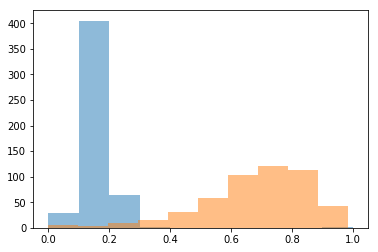

In [42]:
import matplotlib.pyplot as plt
# 4-d
plt.hist(MyDataFram_MinMaxScaler['Glucose'], alpha=0.5)
plt.hist(MyDataFram_Normalize['Glucose'], alpha=0.5)[2]

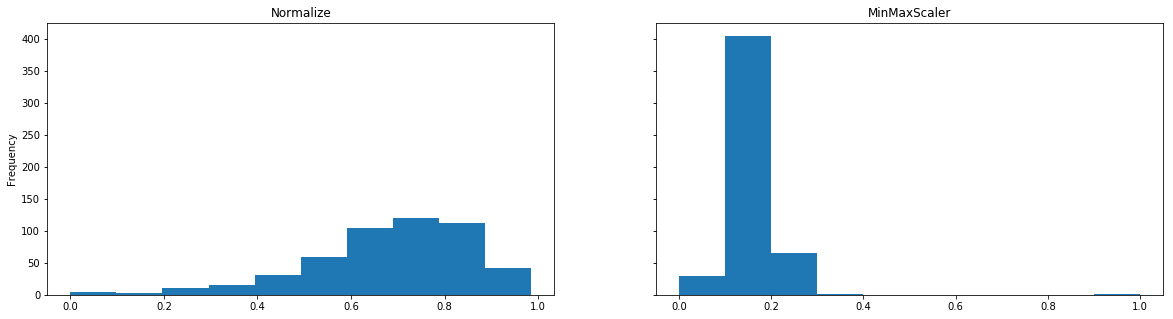

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row',figsize=(20,5))
MyDataFram_Normalize['Glucose'].plot(kind='hist',title="Normalize" , ax=ax[0])
MyDataFram_MinMaxScaler['Glucose'].plot(kind='hist',title="MinMaxScaler",ax=ax[1] )